In [1]:
import pandas as pd

df = pd.read_csv('regression.csv')
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [3]:
df.corr()

,TV,Radio,Social Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


<AxesSubplot:>

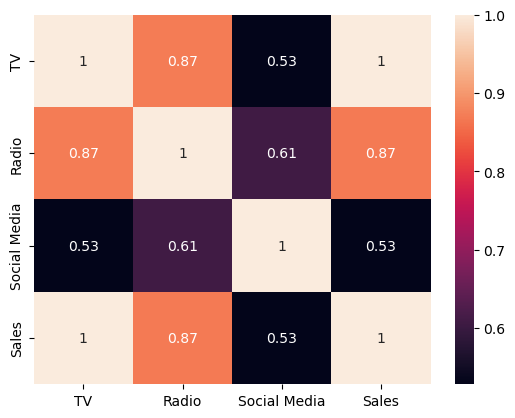

In [4]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [2]:
df.dropna(axis=0, inplace=True)

In [3]:
x = df.drop(columns=['Sales'], axis=1)
y = df['Sales']

In [4]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,
                        train_size=0.8, random_state=4)

In [5]:
xtrain.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer       object
dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
xtrain['Influencer']=enc.fit_transform(
    xtrain['Influencer'])
xtest['Influencer'] = enc.transform(xtest['Influencer'])

In [7]:
xtrain.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer        int32
dtype: object

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # Create model
model.fit(xtrain, ytrain) #Train model

LinearRegression()

In [22]:
model.coef_

array([ 3.56247116e+00,  1.43125714e-03, -8.55890809e-03, -1.63204675e-02])

In [27]:
model.intercept_

-0.18004493157621937

In [24]:
trainpred = model.predict(xtrain) #Predicting Training Data
testpred = model.predict(xtest) #Predicting Testing Data

In [9]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytrain, trainpred)
mse 

8.721535956859082

In [10]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, testpred)
mae

2.3220877216337383

In [11]:
import math
rmse = math.sqrt(mse)
rmse

2.9532246709079013

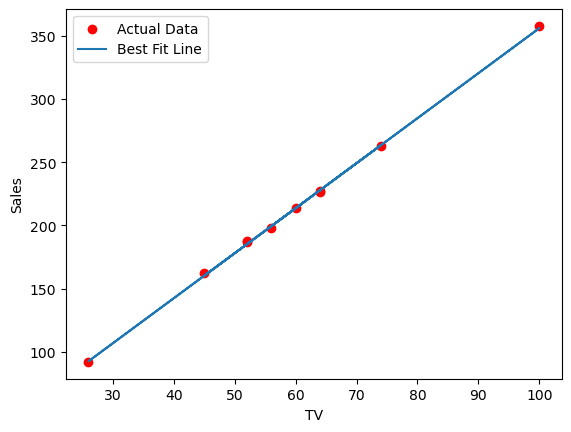

In [19]:
import matplotlib.pyplot as plt

plt.scatter(xtest['TV'][:10], ytest[:10], label='Actual Data', color='red')
plt.plot(xtest['TV'][:10], testpred[:10], label='Best Fit Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()